# Recap code

In [4]:
my_fav_things=[{'name':'raindrops on roses'}]

[s for s in my_fav_things if s['name'] == 'raindrops on roses']

[{'name': 'raindrops on roses'}]

In [10]:
names = [
    {
        'name': 'Eric',
        'surname': 'Ma'
    },
    {
        'name': 'Jeffrey',
        'surname': 'Elmer'
    },
    {
        'name': 'Mike',
        'surname': 'Lee'
    },
    {
        'name': 'Jennifer',
        'surname': 'Elmer'
    }
]

In [8]:
def find_persons_with_surname(persons, query_surname):
    # Assert that the persons parameter is a list. 
    # This is a good defensive programming practice.
    assert isinstance(persons, list)   

    results = []
    for person in persons:
        if person['surname'] == query_surname:
            results.append(person)

    return results

In [9]:
# Test your result below.
results = find_persons_with_surname(names, 'Lee')
assert len(results) == 1

results = find_persons_with_surname(names, 'Elmer')
assert len(results) == 2

# Introduction

# NetworkX API

In [2]:
import networkx as nx
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
from nams import load_data as cf

warnings.filterwarnings('ignore')

In [5]:
G = cf.load_seventh_grader_network()

In [6]:
type(G)

networkx.classes.digraph.DiGraph

In [7]:
H = nx.Graph()
type(H)

networkx.classes.graph.Graph

In [11]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29))

In [8]:
list(G.nodes())[0:5]

[1, 2, 3, 4, 5]

In [9]:
len(G.nodes())

29

In [10]:
list(G.nodes(data=True))[0:5]

[(1, {'gender': 'male'}),
 (2, {'gender': 'male'}),
 (3, {'gender': 'male'}),
 (4, {'gender': 'male'}),
 (5, {'gender': 'male'})]

In [12]:
G.nodes[1]

{'gender': 'male'}

In [15]:
for n, d in G.nodes(data=True):
    # n is the node
    # d is the metadata dictionary
    # print(n, d)
    pass

In [26]:
def node_metadata(G):
    """Counts of students of each gender."""
    from collections import Counter

    mf_counts = Counter([d["gender"] for n, d in G.nodes(data=True)])
    return mf_counts


def edge_metadata(G):
    """Maximum number of times that a student rated another student."""
    counts = [d["count"] for n1, n2, d in G.edges(data=True)]
    maxcount = max(counts)
    return maxcount

In [16]:
from nams.solutions.intro import node_metadata

mf_counts = node_metadata(G)

In [19]:
from typing import Dict

def test_answer(mf_counts: Dict):
    assert mf_counts['female'] == 17
    assert mf_counts['male'] == 12

test_answer(mf_counts)

In [21]:
list(G.edges(data=True))[0:5]

[(1, 2, {'count': 1}),
 (1, 3, {'count': 1}),
 (1, 4, {'count': 2}),
 (1, 5, {'count': 2}),
 (1, 6, {'count': 3})]

In [27]:
for n1, n2, d in G.edges(data=True):
    # n1, n2 are the nodes
    # d is the metadata dictionary
    # print(n1, n2, d)
    pass

# Visualization

In [29]:
from nams import load_data as cf
import networkx as nx
import matplotlib.pyplot as plt

G = cf.load_seventh_grader_network()

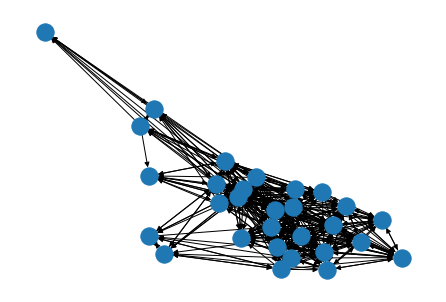

In [30]:
nx.draw(G)

In [32]:
G.is_directed()

True

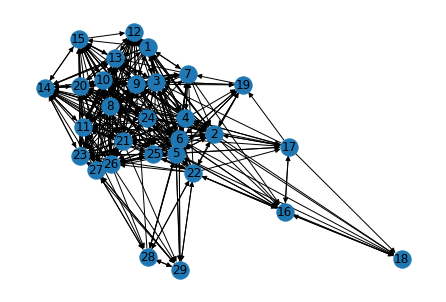

In [33]:
nx.draw(G, with_labels=True)

TypeError: draw() takes 0 positional arguments but 1 was given

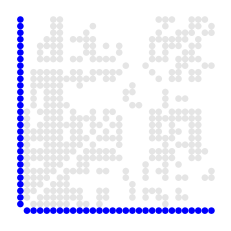

In [38]:
import nxviz as nv 
from nxviz import annotate, MatrixPlot

m = MatrixPlot(G)
m.draw()

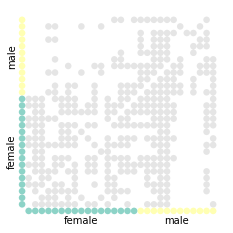

In [34]:
nv.matrix(G, group_by="gender", node_color_by="gender")
annotate.matrix_group(G, group_by="gender")

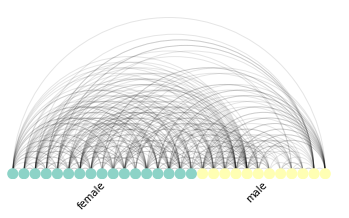

In [35]:
# a = ArcPlot(G, node_color='gender', node_grouping='gender')
nv.arc(G, node_color_by="gender", group_by="gender")
annotate.arc_group(G, group_by="gender")

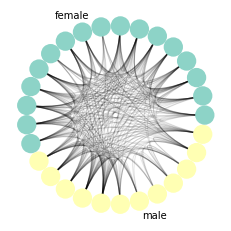

In [36]:
nv.circos(G, group_by="gender", node_color_by="gender")
annotate.circos_group(G, group_by="gender")